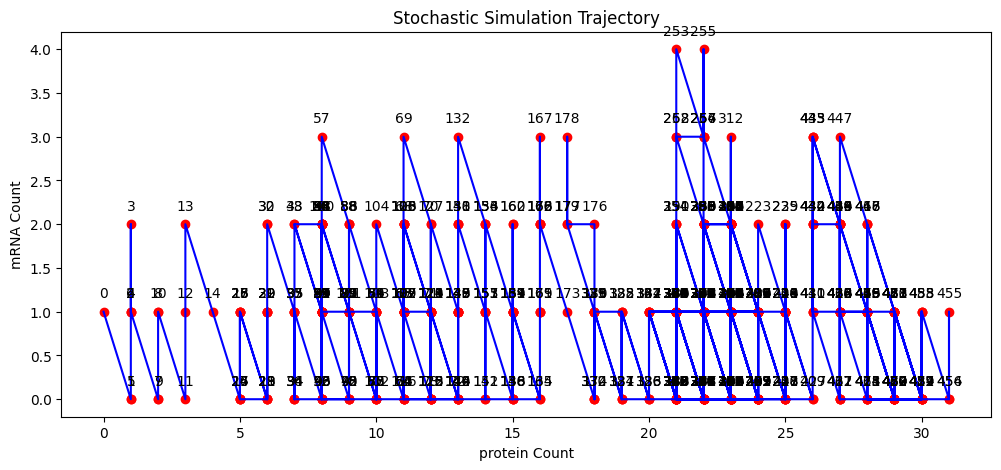

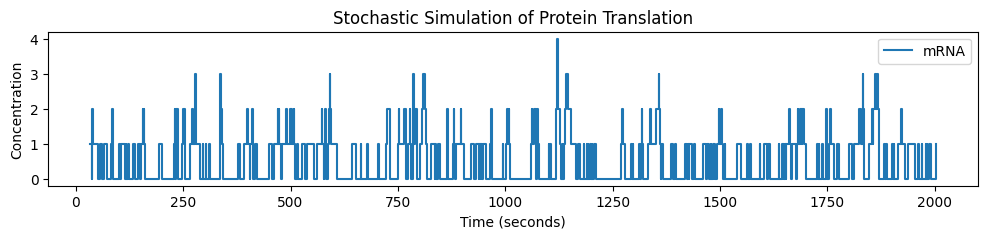

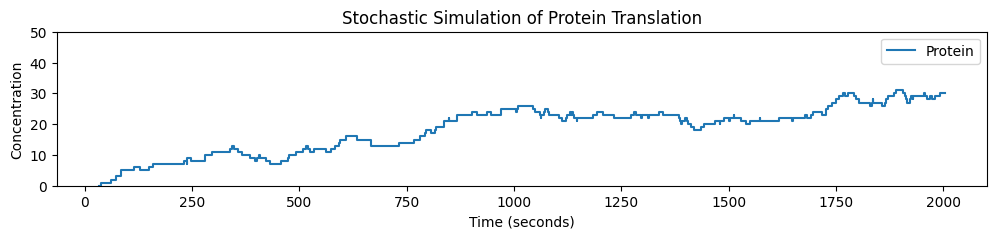

In [7]:
import numpy as np
import matplotlib.pyplot as plt

k1 = 0.1
k2 = 0.1
k3 = 0.1
k4 = 0.002

def ssa():
    mRNA_init = 0
    protein_init = 0

    tf = 2000 

    time = 0
    mRNA = mRNA_init
    protein = protein_init

    time_points = []
    mRNA_values = []
    protein_values = []

    while time < tf:

        a1 = k1 * (1 + 0 * protein)  # kfd is set to 0
        a2 = k2 * mRNA
        a3 = k3 * mRNA
        a4 = k4 * protein
        
        total_a = a1 + a2 + a3 + a4

        if total_a==0:
            break
        
        num1 = np.random.uniform()
        num2 = np.random.uniform()

        tau=(1/total_a)*np.log(1/num1)
        
        probabilities = np.array([a1, a2, a3, a4] )/ total_a

        index=0
        sum=0
        while True:
            sum=sum+probabilities[index]
            if sum>=num2:
                break
            index+=1
        
        if index == 0:
            mRNA += 1
        elif index == 1:
            mRNA -= 1
            protein += 1
        elif index == 2:
            mRNA -= 1
        elif index==3:
            protein -= 1
        
        time += tau
        
        time_points.append(time)
        mRNA_values.append(mRNA)
        protein_values.append(protein)

    return time_points,mRNA_values,protein_values

time_points,mRNA_values,protein_values=ssa()
plt.figure(figsize=(12,5))
plt.scatter(protein_values, mRNA_values, color='red', marker='o')
plt.plot(protein_values, mRNA_values, color='blue', linestyle='-')
plt.xlabel('protein Count')
plt.ylabel('mRNA Count')
plt.title('Stochastic Simulation Trajectory')

for index, (x, y) in enumerate(zip(protein_values, mRNA_values)):
    plt.annotate(f'{index}', (x, y), textcoords="offset points", xytext=(0,10), ha='center')
plt.show()

plt.figure(figsize=(12,2))
plt.step(time_points, mRNA_values, where='post', label='mRNA')
plt.xlabel('Time (seconds)')
plt.ylabel('Concentration')
plt.legend()
plt.title('Stochastic Simulation of Protein Translation')
plt.show()

plt.figure(figsize=(12,2))
plt.step(time_points, protein_values, where='post',label='Protein')
plt.xlabel('Time (seconds)')
plt.ylabel('Concentration')
plt.legend()
plt.title('Stochastic Simulation of Protein Translation')
plt.ylim(0,50)
plt.show()


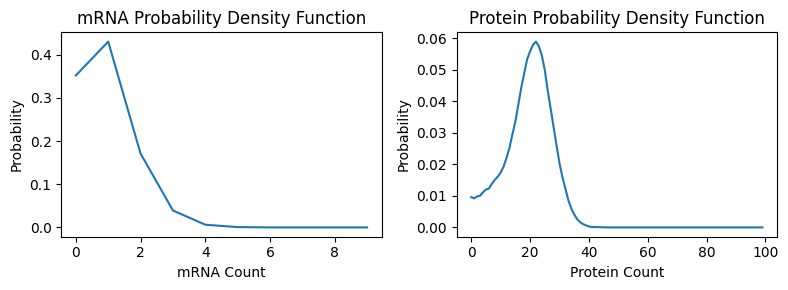

In [8]:
trajectories=[]

for i in range(2000):
    states=[[0,0]]
    time_points,mRNA_values,protein_values=ssa()

    for i in range(len(mRNA_values)):
        states.append([mRNA_values[i],protein_values[i]])
    trajectories.append(states)


mRNA_counts = np.arange(0, 10)
protein_counts=np.arange(0,100)

mRNA_occurrences = np.zeros(len(mRNA_counts))
protein_occurrences = np.zeros(len(protein_counts))

total_states=0

for trajectory in trajectories:
    total_states+=len(trajectory)
    
    for state in trajectory:
        mRNA_occurrences[state[0]] += 1
        protein_occurrences[state[1]] +=1

mRNA_pdf = mRNA_occurrences / total_states
protein_pdf = protein_occurrences / total_states

fig, axs = plt.subplots(1, 2, figsize=(8, 3))

axs[0].plot(mRNA_counts, mRNA_pdf)
axs[0].set_xlabel('mRNA Count')
axs[0].set_ylabel('Probability')
axs[0].set_title('mRNA Probability Density Function')

axs[1].plot(protein_counts, protein_pdf)
axs[1].set_xlabel('Protein Count')
axs[1].set_ylabel('Probability')
axs[1].set_title('Protein Probability Density Function')

plt.tight_layout()
plt.show()


In [9]:
import csv

with open('trajectories.csv', "w", newline="") as csvfile:
    csvwriter = csv.writer(csvfile)
    for trajectory in trajectories:
        csvwriter.writerow(trajectory)